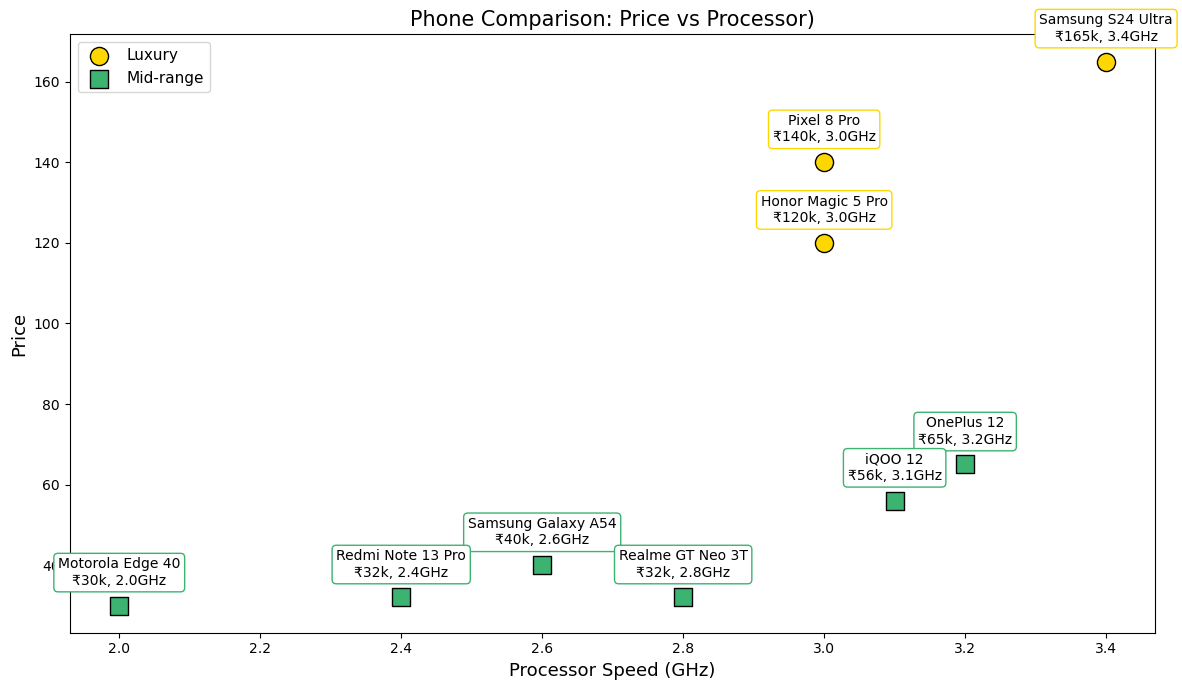

In [21]:
#Implement LDA by taking dataset of different model of phones and then plot them on the basis of processor and price on x and y axis and then 
#classify the phones in luxury and mid range category
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Phone data
data = [
    ['Samsung S24 Ultra', 165, 3.4, 1],
    ['Pixel 8 Pro', 140, 3.0, 1],
    ['OnePlus 12', 65, 3.2, 0],
    ['Samsung Galaxy A54', 40, 2.6, 0],
    ['Realme GT Neo 3T', 32, 2.8, 0],
    ['Redmi Note 13 Pro', 32, 2.4, 0],
    ['Motorola Edge 40', 30, 2.0, 0],
    ['iQOO 12', 56, 3.1, 0],
    ['Honor Magic 5 Pro', 120, 3.0, 1]
]
features = ['Price', 'Processor']
df = pd.DataFrame(data, columns=['Model'] + features + ['IsLuxury'])

# LDA fit for class prediction
X = df[features].astype(float)
y = df['IsLuxury']
lda = LinearDiscriminantAnalysis()
df['LDA_Pred'] = lda.fit(X, y).predict(X)

plt.figure(figsize=(12, 7))
for label, marker, color in zip([1, 0], ['o', 's'], ['gold', 'mediumseagreen']):
    idxs = np.where(df['LDA_Pred'] == label)[0]
    plt.scatter(X.iloc[idxs,1], X.iloc[idxs,0],
                marker=marker, color=color, s=170,
                label='Luxury' if label == 1 else 'Mid-range', edgecolor='black')
    for i in idxs:
        details = f"{df.iloc[i]['Model']}\n₹{df.iloc[i]['Price']}k, {df.iloc[i]['Processor']}GHz"
        plt.annotate(details, (X.iloc[i,1], X.iloc[i,0]),
                     xytext=(0,15), textcoords='offset points', fontsize=10, ha='center',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1))

plt.xlabel('Processor Speed (GHz)', fontsize=13)
plt.ylabel('Price', fontsize=13)
plt.title('Phone Comparison: Price vs Processor)', fontsize=15)
plt.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()
